# Runge–Kutta

How to use the module.

In [3]:
from Solver.RungeKutta import exRK

In [4]:
#define RK4 parameters
class RK4:
    def __init__(self):
        #these are used by the RK class
        self.s=4
        self.c=[0,0.5,0.5,1.]
        self.b=[1/6.,1/3.,1/3.,1/6.]
        self.a=[ [0 for j in range(4)] for i in range(4)]
        self.a[1][0]=0.5
        self.a[2][1]=0.5
        self.a[3][2]=1.
        #you can have other attributes for error estimation
        #or to keep track of different things you want.
        
        
        
rk4=RK4()

#define Euler parameters
class euler:
    def __init__(self):
        self.s=1
        self.c=[0]
        self.b=[1]
        self.a=[ [0 for j in range(1)] for i in range(1)]
        
eu=euler()


In [5]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [6]:
class diff_eq:
    def __init__(self,n=1):
        self.n_eqs=n
        
                   
    def __call__(self,y,t):
        return [-20*y[0]*t**3,
                5*y[0]*t**2+2*(-y[1]**2+y[2]**2)*t,  
                15*y[0]*t**2+2*(y[1]**2-y[2]**2)*t ]

    
dydt=diff_eq(3)

in0=[5,10,0]
sol1=exRK(dydt,in0,2000,RK_method=rk4)
sol2=exRK(dydt,in0,2000,RK_method=eu)

In [7]:
%%timeit -n 1 -r 1
sol1.solve()

77.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
sol2.solve()

28.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<IPython.core.display.Javascript object>


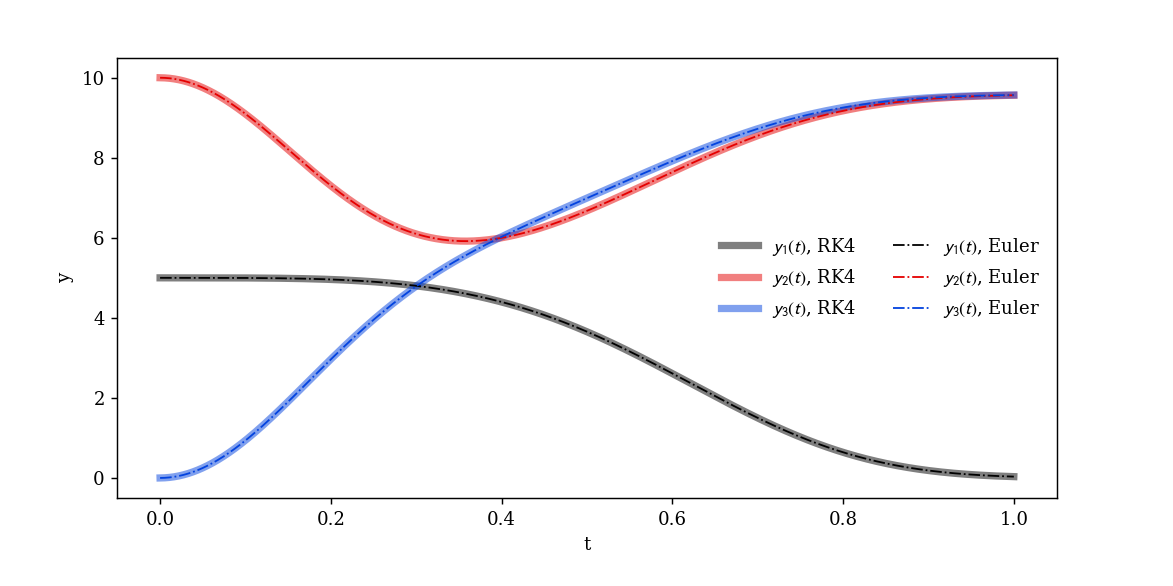

In [9]:
fig=plt.figure(figsize=(9,4.5))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)
for i in range(len(sol1.solution)):
    sub.plot(sol1.steps,sol1.solution[i],c=_c[i],alpha=0.5,linestyle='-',linewidth=4,label=r'$y_{'+str(i+1)+'}(t)$, RK4')
    
for i in range(len(sol2.solution)):
    sub.plot(sol2.steps,sol2.solution[i],c=_c[i],linestyle='-.',linewidth=1,label=r'$y_{'+str(i+1)+'}(t)$, Euler')

sub.set_ylabel('y')      
sub.set_xlabel('t')  
sub.legend(framealpha=0,ncol=2,loc='center right',bbox_to_anchor=(1,0.5))

plt.show()